In [128]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#barplot == categorical data
#histogram = numerical data

In [129]:
train=pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [130]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [132]:
train.shape #used to see the size of the table

(891, 12)

In [133]:
train['Survived'].keys

<bound method Series.keys of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

In [134]:
train['Survived'].value_counts().keys #used to see the type of keys in the colums

<bound method Series.keys of 0    549
1    342
Name: Survived, dtype: int64>

In [135]:
train['Survived'].value_counts() #used to see the count of 1's and 0's.

0    549
1    342
Name: Survived, dtype: int64

# EDA part

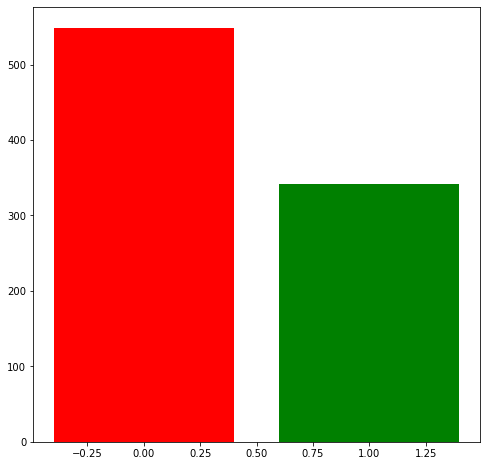

In [136]:
#plotting the values of survived people.
plt.figure(figsize=(8,8))
plt.bar(list(train['Survived'].value_counts().keys()),list(train['Survived'].value_counts()),color=['r','g'])
plt.show()

In [137]:
train['Pclass'].value_counts().keys() #calculating passengers class

Int64Index([3, 1, 2], dtype='int64')

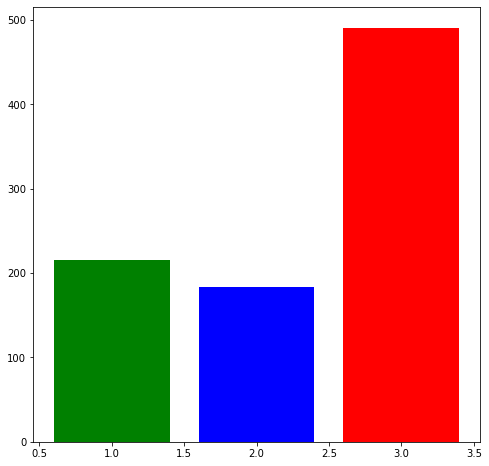

In [138]:
#plotting the berth class people.
plt.figure(figsize=(8,8))
plt.bar(list(train['Pclass'].value_counts().keys()),list(train['Pclass'].value_counts()),color=['r','g','b'])
plt.show()

In [139]:
train['Sex'].value_counts().keys() 

Index(['male', 'female'], dtype='object')

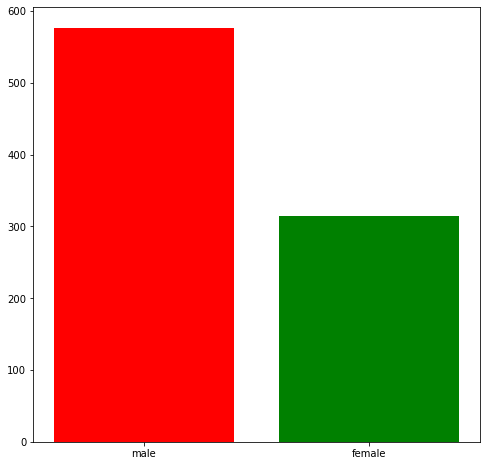

In [140]:
#plotting the sex of people who traveled in titanic. as bar plot
plt.figure(figsize=(8,8))
plt.bar(list(train['Sex'].value_counts().keys()),list(train['Sex'].value_counts()),color=['r','g'])
plt.show()

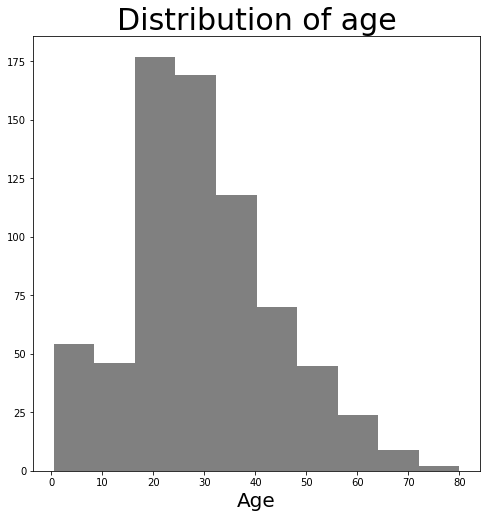

In [141]:
#plotting the age of people who traveled in titanic. as bar histogram because its a numerical value.
plt.figure(figsize=(8,8))
plt.hist(train['Age'],color="grey")
plt.title("Distribution of age",size=30)
plt.xlabel("Age", size=20)
plt.show()

# On the basis of age we decide whether he survived, so now we check for the null values

In [142]:
train['Survived'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool

In [143]:
sum(train['Survived'].isnull()) #total no of null values

0

In [144]:
#same for the Age column

sum(train['Age'].isnull())  #total no of null values

177

In [145]:
#droping the non exisiting values

train=train.dropna()

sum(train['Age'].isnull())  #total no of null values

0

# Building model

In [148]:
#Training data feeding
X_train=train[['Age']]
y_train=train[['Survived']]

In [149]:
#importing and fitting the model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Predicitng Part

In [150]:
sum(test['Age'].isnull())

86

In [151]:
test=test.dropna()
sum(test['Age'].isnull())

0

In [157]:
#feeding testing data 

X_test=test[['Age']]


In [158]:
y_pred=clf.predict(X_test)

In [159]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)